In [1]:

import numpy as np
import os
import cv2
import tqdm
import random
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

Using TensorFlow backend.


In [2]:
X = '../input/images/Images/Train'
y = '../input/images/Images/Test'

In [3]:
def one_hot_encode(image):
    category= image.split('.')[0]
    if(category=='mi'):
        label = np.array([1,0,0,0,0])
    elif category=='ik':
        label = np.array([0,1,0,0,0])
    elif category=='pi':
        label = np.array([0,0,1,0,0])
    elif category=='ree':
        label = np.array([0,0,0,1,0])
    elif category=='ri':
        label = np.array([0,0,0,0,1])
    return label

In [4]:
def label_images(dir):
    images = []
    for i in tqdm.tqdm(os.listdir(dir)):
        path = os.path.join(dir, i)
        image = cv2.imread(path,0)
        image = cv2.resize(image,(28,28))
        images.append([np.array(image),one_hot_encode(i)])
    random.shuffle(images)
    return images

In [5]:
#This part loads the data; it will take a while
X_images = label_images(X)
y_images = label_images(y)
X_image_input = np.array([i[0] for i in X_images]).reshape(-1,28,28,1)
y_image_input = np.array([i[0] for i in y_images]).reshape(-1,28,28,1)
X_label_input = np.array([i[1] for i in X_images])
y_label_input = np.array([i[1] for i in y_images])

100%|██████████| 50/50 [00:00<00:00, 694.01it/s]


In [6]:
model = Sequential()

model.add(InputLayer(input_shape=[28,28,1]))
model.add(Conv2D(filters=32, kernel_size=5,strides=1,padding='same', activation='tanh'))
model.add(MaxPool2D(pool_size=3, padding='same'))

model.add(Conv2D(filters=80, kernel_size=5,strides=1,padding='same', activation='tanh'))
model.add(MaxPool2D(pool_size=3, padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(5, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.compile(optimizer = Adam(lr=1e-3), loss= 'categorical_crossentropy', metrics=['accuracy'])


In [8]:
model.fit(x= X_image_input, y= X_label_input, epochs=50, batch_size=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
450/450 [==============================] - 3s 6ms/step - loss: 1.8467 - acc: 0.3222
Epoch 2/50
450/450 [==============================] - 0s 54us/step - loss: 0.9398 - acc: 0.6400
Epoch 3/50
450/450 [==============================] - 0s 53us/step - loss: 0.4655 - acc: 0.8756
Epoch 4/50
450/450 [==============================] - 0s 53us/step - loss: 0.2917 - acc: 0.9311
Epoch 5/50
450/450 [==============================] - 0s 53us/step - loss: 0.1963 - acc: 0.9333
Epoch 6/50
450/450 [==============================] - 0s 56us/step - loss: 0.1237 - acc: 0.9667
Epoch 7/50
450/450 [==============================] - 0s 54us/step - loss: 0.0735 - acc: 0.9822
Epoch 8/50
450/450 [==============================] - 0s 54us/step - loss: 0.0598 - acc: 0.9822
Epoch 9/50
450/450 [==============================] - 0s 59us/step - loss: 0.0504 - acc: 0.9889
Epoch 10/50
450/450 [==============================] - 0s 52us/step - loss: 0.0352 - acc:

In [9]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 80)        64080     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 80)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 80)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               655872    
__________

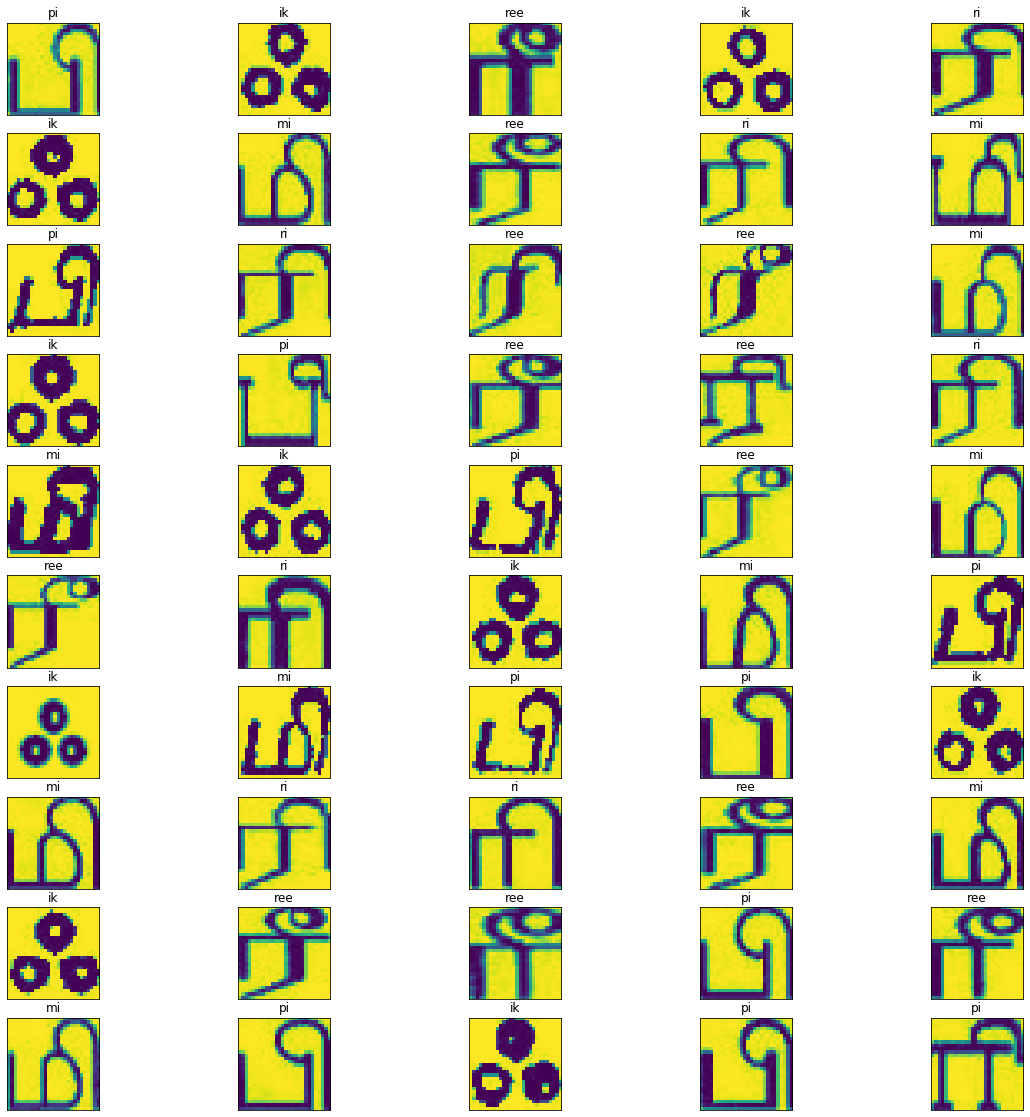

In [10]:
fig = plt.figure(figsize=(20,20))

for i, test_imgs in enumerate(y_images):
    y = fig.add_subplot(10,5,i+1)
    image = test_imgs[0]
    test_imgs = image.reshape(1,28,28,1)
    predictions = model.predict([test_imgs])

    if np.argmax(predictions) == 0:
        alphabet = 'mi'
    elif np.argmax(predictions) == 1:
        alphabet = 'ik'
    elif np.argmax(predictions) == 2:
        alphabet = 'pi'
    elif np.argmax(predictions) == 3:
        alphabet = 'ree'
    elif np.argmax(predictions) == 4:
        alphabet = 'ri'
    y.imshow(image)
    plt.title(alphabet)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()
